# Assignment3

1. sklearn 패키지를 사용해 로지스틱 회귀모형으로 데이터를 분석해 주세요 
2. 성능지표를 계산하고 이에 대해 해석해 주세요 
   - sklearn : mean accuracy, f1 score 등 다양한 성능지표 계산 
   - confusion matrix : tp, fp, fn, tn 값을 통해 성능지표 계산  
3. 어떤 성능지표를 기준으로 성능을 개선을 시도했고, 그러한 선택의 이유를 적어주세요.
4. **해석을 상세하게 달아주세요 !**

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
credit = pd.read_csv("assignment3_creditcard.csv")

In [3]:
credit

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28673,2.063299,0.015015,-1.042161,0.409655,-0.069835,-1.198490,0.243507,-0.385099,0.408691,0.047861,...,-0.169749,-0.278942,-0.625629,0.331276,0.070205,-0.269826,0.192509,-0.064914,-0.058058,0
28674,1.264844,-1.228616,1.579098,-0.204514,-1.958881,0.546495,-1.764072,0.470377,1.002209,0.274005,...,-0.125401,0.144909,0.718615,-0.038493,0.103706,0.341100,-0.009807,0.089794,0.019848,0
28675,2.072659,0.190048,-1.759688,0.378909,0.556826,-0.769874,0.246899,-0.274561,0.380960,-0.405147,...,-0.084170,-0.361188,-0.910782,0.304372,0.401511,-0.212440,0.177857,-0.058961,-0.029035,0
28676,-0.690637,1.342271,1.498129,2.049774,1.055691,0.677197,0.855445,-0.467242,-0.681576,1.485542,...,0.030868,0.110939,0.453065,-0.355346,-0.771072,-0.358505,0.101309,-0.849084,-0.312999,0


In [4]:
# 데이터 형태
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28678 entries, 0 to 28677
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      28678 non-null  float64
 1   V2      28678 non-null  float64
 2   V3      28678 non-null  float64
 3   V4      28678 non-null  float64
 4   V5      28678 non-null  float64
 5   V6      28678 non-null  float64
 6   V7      28678 non-null  float64
 7   V8      28678 non-null  float64
 8   V9      28678 non-null  float64
 9   V10     28678 non-null  float64
 10  V11     28678 non-null  float64
 11  V12     28678 non-null  float64
 12  V13     28678 non-null  float64
 13  V14     28678 non-null  float64
 14  V15     28678 non-null  float64
 15  V16     28678 non-null  float64
 16  V17     28678 non-null  float64
 17  V18     28678 non-null  float64
 18  V19     28678 non-null  float64
 19  V20     28678 non-null  float64
 20  V21     28678 non-null  float64
 21  V22     28678 non-null  float64
 22

In [5]:
# 변수들 통계값
credit.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,...,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000
mean,-0.015438,0.053653,-0.046031,0.037348,-0.033724,-0.003299,-0.051054,0.006064,-0.018530,-0.041149,...,0.002633,0.010289,-0.000656,-0.004800,-0.000897,-0.001989,-0.000765,0.000948,0.001535,0.008578
std,2.031529,1.616186,1.758169,1.482109,1.486998,1.339259,1.454827,1.364342,1.134065,1.252593,...,0.720307,0.847152,0.739469,0.593663,0.603349,0.517968,0.483852,0.397075,0.296736,0.092221
min,-30.552380,-42.172688,-31.103685,-5.560118,-42.147898,-21.929312,-41.506796,-39.267378,-13.434066,-24.403185,...,-21.387122,-21.453736,-8.887017,-36.666000,-2.718024,-6.712624,-2.241620,-7.418878,-9.617915,0.000000
25%,-0.916927,-0.575381,-0.899872,-0.843321,-0.714901,-0.763757,-0.568146,-0.206103,-0.661909,-0.543450,...,-0.209678,-0.225520,-0.539244,-0.160583,-0.356047,-0.318619,-0.327343,-0.070558,-0.052189,0.000000
50%,0.020050,0.075358,0.180610,-0.008844,-0.060040,-0.271363,0.036107,0.022463,-0.055095,-0.097390,...,-0.062792,-0.028778,0.007302,-0.011199,0.040006,0.019770,-0.056260,0.002049,0.011075,0.000000
75%,1.317461,0.806957,1.029928,0.771958,0.613328,0.397269,0.559409,0.329606,0.605704,0.460681,...,0.131199,0.184312,0.526358,0.146835,0.437146,0.352717,0.240713,0.091637,0.078911,0.000000
max,2.399484,21.467203,4.069865,11.927512,32.911462,22.529298,36.677268,20.007208,8.113152,15.236028,...,26.237391,27.202839,8.361985,9.637187,3.948061,2.510401,3.122747,11.135740,14.929133,1.000000


In [6]:
# 결측치 확인 
credit.isna().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
Class    0
dtype: int64

In [8]:
print('target distribution : ', credit.Class.mean()) # 전체 데이터의 0.8% 많이 사기 거래 데이터 이다.
print('fraud data : ', credit.Class.sum()) # 총 28678건의 데이터중에 246개 만이 사기 거래 데이터 이다.

target distribution :  0.008578004044912477
fraud data :  246


In [9]:
credit.Class.value_counts().to_frame().reset_index().rename(columns = {"index":"Class", "Class":"Count"})

,Class,Count
0,0,28432
1,1,246


* Target의 분포를 보면 전체의 0.8% 만이 신용카드 사기인 데이터로 unbalance 데이터이다.
* 이 점을 유의하고 모델의 성능지표를 설정해야한다.

## Logistic Regression 

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [11]:
y = credit.Class
credit.drop(columns = 'Class', axis = 1 , inplace= True)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(credit, y, test_size = 0.3, random_state = 55)

In [13]:
# Logistic Regression
lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression()

In [14]:
pred = lr.predict(X_test)
pred_proba = lr.predict_proba(X_test)

print(pred)     # class predict
print(pred_proba) # class predict_proba
print('Accuracy : ', lr.score(X_train, y_train))

[0 0 0 ... 0 0 0]
[[9.99831675e-01 1.68325285e-04]
 [9.96952760e-01 3.04723960e-03]
 [9.99879727e-01 1.20273209e-04]
 ...
 [9.99871942e-01 1.28058167e-04]
 [9.99962640e-01 3.73598021e-05]
 [9.89457732e-01 1.05422679e-02]]
Accuracy :  0.9980571884029092


In [15]:
cm = pd.DataFrame(confusion_matrix(y_test, pred), index=['RN','RP'], columns = ['PN','PP'])
cm 

,PN,PP
RN,8523,5
RP,13,63


* 위의 결과는 Confusion Matrix의 결과이다. TN : 실제 1이 아니고 예측 1이 아닌 경우, TP : 실제 1이고 예측 1인 경우, FN : 실제 1이고 예측 1이 아닌 경우, FP : 실제 1이고 예측 1인 경우
* 실제 카드 사기 거래가 아닌 8528개 데이터 중 5개의 경우만 오분류를 하였고, 8523개의 경우는 정분류를 하였다.
* 실제 카드 사기 거래인 76개 데이터 중 13개의 경우 오분류를 하였고, 63개의 경우 정분류를 하였다.
* 카드사기라고 예측한 경우 실제 카드 사기가 아닌 5개의 경우를 제외하고 모두 카드 사기라고 예측을 하였다.
* 하지만 카드사기가 아니라고 예측한 경우중 실제 카드 사기인 13개의 경우를 오분류하였다. 


In [16]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

accuracy = (tp + tn)/ (tp+fn+fp+tn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
specificity = tn / (fp + tn)
f1_score =  2* (precision* recall) / (precision + recall)

print("Accuracy : ", accuracy)
print("Precision : ", precision)
print("Recall : ", recall)
print('Specificity : ', specificity)
print("f1_score : ", f1_score)

Accuracy :  0.997907949790795
Precision :  0.9264705882352942
Recall :  0.8289473684210527
Specificity :  0.9994136960600375
f1_score :  0.875


In [17]:
print(classification_report(y_test, pred, digits= 5, target_names=["not 1", " 1"]))
print("ROC AUC SCORE : ", roc_auc_score(y_test, pred))

              precision    recall  f1-score   support

       not 1    0.99848   0.99941   0.99895      8528
           1    0.92647   0.82895   0.87500        76

    accuracy                        0.99791      8604
   macro avg    0.96247   0.91418   0.93697      8604
weighted avg    0.99784   0.99791   0.99785      8604

ROC AUC SCORE :  0.9141805322405451


#### PR Curve

In [18]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

def plot_precision_recall_curve(model, precisions, recalls, AP) :
    AP = ' (' + str(round(AP, 2)) + ')'
    plt.plot(recalls, precisions, label=model+AP)
    plt.axis([0,1,0,1])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('PR curve')
    plt.legend()


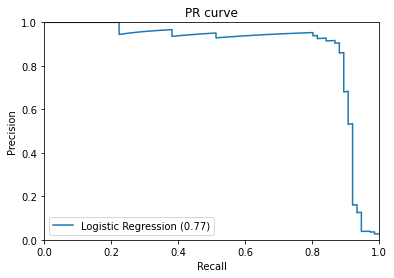

In [19]:
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba[:,1])
average_precision = average_precision_score(y_test, pred)
plot_precision_recall_curve('Logistic Regression', precisions, recalls, average_precision)

#### PR by threshold

In [20]:
def plot_precision_recall_by_threshold(precisions, recalls, thresholds) :
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plotting. 정밀도는 점선으로 표시
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    _, end = plt.xlim()
    plt.xticks(np.round(np.arange(0, end, 0.1),2))    
    plt.xlabel('Threshold'); 
    plt.ylabel('Precision & Recall')
    plt.legend(); plt.grid(); plt.title('PR by threshold')
    plt.show()

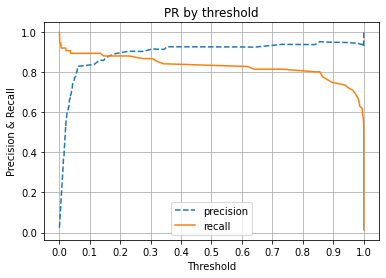

In [21]:
plot_precision_recall_by_threshold(precisions, recalls, thresholds)

#### ROC Curve

In [22]:
def plot_roc_curve(fpr, tpr, recall ,model, color = None) :
    model = model + '(auc = %0.3f)'% auc(fpr, tpr)
    plt.plot(fpr, tpr, label=model, color=color)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.plot([recall], 'ro')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR (1 - specificity)')
    plt.ylabel('TPR (recall)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")

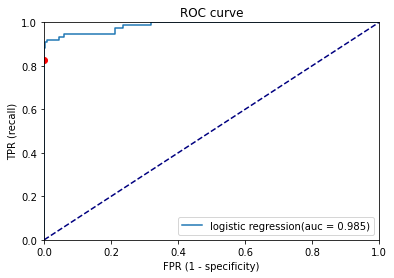

In [23]:
fpr, tpr , thresholds= roc_curve(y_test, pred_proba[:,1])
plot_roc_curve(fpr,tpr,recall ,'logistic regression')

    이 모델은 unbalance data 이므로 Accuracy 로만 평가하기 힘들기 때문에 precision, recall, f1-score을 확인해야 한다.
    성능 지표를 확인해 보면 precision이 92%로 우수한 성능을 보이지만 recall은 82%로 precision성능에 미치지 못한다.

    즉, 카드 사기거래라고 예측한 것이 실제 카드 사기거래인 경우는 우수하지만, 실제로 카드 사기거래인것중에 카드 사기거래라고 예측한 경우는 앞의 기준에 미치지 못한다.
    
    또한 , PR Curve는  77%에 비해 ROC Curve는 98.5%로 좋은 성능을 내고 있다.
   
    카드 사기의 경우 실제 사기거래인것을 사기거래가 아니라고 잘못 판단할 경우가 실제 사기거래가 아닌것을 사기거래라고 판단하는 경우보다 비용이 크기 때문에 Recall의 성능을 올려하한다. 따라서 Recall을 주요 성능지표로 지정하고 모델을 개선해야 한다.
    
    결론적으로 Recall을 개선하기 위해 기존에 사용하던 임계값을 변화하여 평가지표 개선을 고려해야 한다.

In [24]:
thresholds[np.argmax(tpr - fpr)]

0.02157026464876801

### Change Threshold

In [25]:
def get_score_by_threshold(y_true, y_pred, threshold) :
    
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    accuracy = (tp + tn)/ (tp+fn+fp+tn)
    precision = (tp) / (tp + fp)
    recall = (tp) / (tp + fn)
    specificity = (tn) / (fp + tn)
    f1_score =  2* (precision* recall) / (precision + recall)
    
    print('threshold : ', threshold)
    print("Accuracy : ", accuracy)
    print("Precision : ", precision)
    print("Recall : ", recall)
    print("Specificity : ", specificity)
    print("f1_score : ", f1_score)


In [26]:
threshold_range = np.arange(0.0, 1.0, 0.1)
for threshold in threshold_range :
    new_pred = [1 if predict > threshold  else 0 for predict in lr.predict_proba(X_test)[:,1]]
    get_score_by_threshold(y_test, new_pred, threshold)
    print("---------------------------------------------------")

threshold :  0.0
Accuracy :  0.008833100883310088
Precision :  0.008833100883310088
Recall :  1.0
Specificity :  0.0
f1_score :  0.01751152073732719
---------------------------------------------------
threshold :  0.1
Accuracy :  0.9975592747559274
Precision :  0.8395061728395061
Recall :  0.8947368421052632
Specificity :  0.9984756097560976
f1_score :  0.8662420382165605
---------------------------------------------------
threshold :  0.2
Accuracy :  0.99814039981404
Precision :  0.9054054054054054
Recall :  0.881578947368421
Specificity :  0.9991791744840526
f1_score :  0.8933333333333332
---------------------------------------------------
threshold :  0.30000000000000004
Accuracy :  0.99814039981404
Precision :  0.9166666666666666
Recall :  0.868421052631579
Specificity :  0.999296435272045
f1_score :  0.8918918918918918
---------------------------------------------------
threshold :  0.4
Accuracy :  0.997907949790795
Precision :  0.9264705882352942
Recall :  0.8289473684210527
Spec

* new confusion matrix

In [27]:
new_pred = [1 if predict > 0.2  else 0 for predict in lr.predict_proba(X_test)[:,1]]
confusion_matrix(y_test, new_pred) # change threshold

array([[8521,    7],
       [   9,   67]], dtype=int64)

In [28]:
get_score_by_threshold(y_test, new_pred, 0.2)

threshold :  0.2
Accuracy :  0.99814039981404
Precision :  0.9054054054054054
Recall :  0.881578947368421
Specificity :  0.9991791744840526
f1_score :  0.8933333333333332


* confusion matrix

In [29]:
confusion_matrix(y_test, pred)

array([[8523,    5],
       [  13,   63]], dtype=int64)

In [30]:
get_score_by_threshold(y_test, pred, 0.5)

threshold :  0.5
Accuracy :  0.997907949790795
Precision :  0.9264705882352942
Recall :  0.8289473684210527
Specificity :  0.9994136960600375
f1_score :  0.875


    위의 결과는 임계값의 변화에 따른 평가지표 성능의 변화를 나타냈다. confusion matrix를 확인해 보면 기존의 confusion matrix에 비해 임계값을 변화한 confusion matrix는 TN의 경우 감소하였고 TP의 경우 증가하였다 FP의 경우 증가하였지만 FN의 경우 감소한 것을 볼 수 있다. 
    
     즉, 기존에 목표로한 Recall의 성능을 올릴 수 있게 되었다. 하지만 Precision의 경우 성능이 떨어졌지만 Precision - Recall은 trade-off 관계를 가지고 있기 때문에 감수해야하는 문제이다. 다른 성능 지표를 확인해 보면 F1-Score는 상승한 것을 볼 수 있다. 또 Accuracy, Specificity 또한 소폭 상승한것을 확인할 수 있다.
        
     
     
        
        
        